![](https://mivia.unisa.it/onfire2023/assets/img/iciap_logo.jpg)
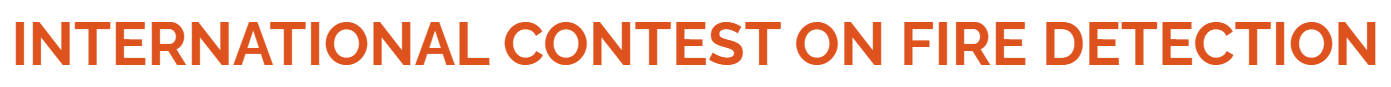

Dear Participant,

Thanks for your participation to ONFIRE Contest 2023.

Please download the following files:
- Training videos: https://drive.google.com/file/d/1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF/view?usp=sharing
- Training annotations: https://drive.google.com/file/d/123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN/view?usp=sharing
- Code example: https://drive.google.com/file/d/1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk/view?usp=sharing

Please remind that:
- The deadline for the submission of the methods is 21st July, 2023. The submission must be done with an email in which the participants share (directly or with external links) the trained model, the code and the report. The participants can receive the training set and its annotations by sending an email to onfire2023@unisa.it, in which they also communicate the name of the team.
- The participants can use these training samples and annotations, but also additional videos.
- The participants must submit their trained model and their code by carefully following the detailed instructions reported in the website.
- The participants are strongly encouraged to submit a contest paper to ICIAP 2023, whose deadline is 28th July, 2023. The contest paper must be also sent by email to the organizers. Otherwise, the participants must produce a brief PDF report of the proposed method.
- The detailed instructions of the proposed method can be downloaded here: https://mivia.unisa.it/onfire2023/

In [ ]:
# You can follow this tutorial for more information - https://www.tutorialspoint.com/google_colab/index.htm
# You can also see this video - https://www.youtube.com/watch?v=inN8seMm7UI

# Mount your Drive - After doing this step, your Google Drive folders are accessible from Google Colab.
#from google.colab import drive
#drive.mount('/content/gdrive')

#Download and unzip

In [ ]:
import gdown
def download_google_file(shader_url, output_name):
  id_url = "https://drive.google.com/uc?id=" + shader_url.split("/")[5]
  gdown.download(id_url, output_name)

Il consiglio è quello di lavorare in locale per almeno la prima fase del progetto. Perché scaricare i file con google drive è molto lento.

In [ ]:
download_google_file("https://drive.google.com/file/d/1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF/view?usp=sharing", "/home/davide/MachineLearning/Project_Work/VIDEOS.zip")
!unzip VIDEOS.zip

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Cambiamo i nomi così è più semplice lavorare con questi dati.

In [ ]:
download_google_file("https://drive.google.com/file/d/123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN/view?usp=sharing", "/home/davide/MachineLearning/Project_Work/GT.zip")
!unzip GT.zip
!mkdir -p GT/TRAINING_SET
!mv GT_TRAINING_SET_CL0 GT/TRAINING_SET/0
!mv GT_TRAINING_SET_CL1 GT/TRAINING_SET/1

I video sono in mp4 format.
SIAMO INCORAGGIATI AD ESPANDERE IL TRAINING SET CON ALTRI VIDEO DA NOI TROVATI.
Per ogni video abbiamo dei file in formato .rtf che ci fanno delle informazioni.

GT sta per ground truth.

In GT_TRAINING_SET_CL0 i file rtf sono tutti vuoti. Mentre in GT_TRAINING_SET_CL1 contengono: indice del frame che è stato visualizzato il fuoco per la prima volta. Nota: in molti video già al frame 0 c'è del fuoco.
I risultati sul test set vengono fatti in questo modo.

In [ ]:
download_google_file("https://drive.google.com/file/d/1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk/view?usp=sharing", "/home/davide/MachineLearning/Project_Work/test_code.zip")
!unzip test_code.zip

#Extract frames from video files

Per lavorare con i video dobbiamo estrarre dei frami dai video. Questa operazione può essere fatta durante l'esecuzione, ma questa strategia è molto lenta. Si possono estrarre tutti i frami sin da subito così da velocizzare il processo sfruttando la libreria di opencv.

In [2]:
videos_path1 = "TRAINING_SET"
videos_path2 = "VALIDATION_SET"
frames_path = "FRAMES"

In [3]:
!rm -R FRAMES/TRAINING_SET/
!rm -R FRAMES/VALIDATION_SET/

rm: cannot remove 'FRAMES/TRAINING_SET/': No such file or directory
rm: cannot remove 'FRAMES/VALIDATION_SET/': No such file or directory


We use ffmpeg to faster the frame extraction

In [4]:
import cv2, os, argparse, glob, PIL, tqdm

def extract_frames(video):
    # Process the video
    ret = True # è True fino a che ci sono frame nel video.
    cap = cv2.VideoCapture(video)
    f = 0
    while ret:
        ret, img = cap.read() # I frame vengono presi dalla read function e questo viene salvato in img (un numpy array)
        if ret:
            f += 1
            PIL.Image.fromarray(img).save(os.path.join(frames_path, video, "{:05d}.jpg".format(f))) # Con la PIL function salviamo l'array come immagine. Con il formato jpeg non sprechiamo troppo spazio ma perdiamo delle informazioni.
    cap.release()

#Con il codice sottostante prendiamo i path di tutti i video nelle directory. Poi salviamo tutti i frame nei frame_path che creiamo.

# For all the videos
file_list_training = [path for path in glob.glob(os.path.join(videos_path1,"**"), recursive=True) # glob.glob restituisce tutti i path di una directory. Ma noi siamo interessati solo ai file e quindi li prendiamo con os.path.isfile(path)
             if os.path.isfile(path)]

file_list_validation = [path for path in glob.glob(os.path.join(videos_path2,"**"), recursive=True) # glob.glob restituisce tutti i path di una directory. Ma noi siamo interessati solo ai file e quindi li prendiamo con os.path.isfile(path)
             if os.path.isfile(path)]

print(file_list_training)
print(file_list_validation)

for video in tqdm.tqdm(file_list_training): # Se ho già caricato i frame di questi video li skippo
  if os.path.isdir(os.path.join(frames_path, video)):
    continue
  os.makedirs(os.path.join(frames_path, video))
  #extract_frames(video) # Invece di chiamare la funzione di prima che è lenta utilizzo questa di sotto che è molto più veloce.
  os.system("ffmpeg -i {} -r 1/1 {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))

for video in tqdm.tqdm(file_list_validation): # Se ho già caricato i frame di questi video li skippo
  if os.path.isdir(os.path.join(frames_path, video)):
    continue
  os.makedirs(os.path.join(frames_path, video))
  #extract_frames(video) # Invece di chiamare la funzione di prima che è lenta utilizzo questa di sotto che è molto più veloce.
  os.system("ffmpeg -i {} -r 1/1 {}/{}/$Frame{}.jpg".format(video, frames_path, video, "%05d"))


['TRAINING_SET/0/Video51.mp4', 'TRAINING_SET/0/Video36.mp4', 'TRAINING_SET/0/Video52.mp4', 'TRAINING_SET/0/Video70.mp4', 'TRAINING_SET/0/Video42.mp4', 'TRAINING_SET/0/Video6.mp4', 'TRAINING_SET/0/Video24.mp4', 'TRAINING_SET/0/Video34.mp4', 'TRAINING_SET/0/Video27.mp4', 'TRAINING_SET/0/Video74.mp4', 'TRAINING_SET/0/Video5.mp4', 'TRAINING_SET/0/Video62.mp4', 'TRAINING_SET/0/Video21.mp4', 'TRAINING_SET/0/Video14.mp4', 'TRAINING_SET/0/Video71.mp4', 'TRAINING_SET/0/Video72.mp4', 'TRAINING_SET/0/Video68.mp4', 'TRAINING_SET/0/Video15.mp4', 'TRAINING_SET/0/Video49.mp4', 'TRAINING_SET/0/Video81.mp4', 'TRAINING_SET/0/Video31.mp4', 'TRAINING_SET/0/Video2.mp4', 'TRAINING_SET/0/Video29.mp4', 'TRAINING_SET/0/Video67.mp4', 'TRAINING_SET/0/Video77.mp4', 'TRAINING_SET/0/Video4.mp4', 'TRAINING_SET/0/Video40.mp4', 'TRAINING_SET/0/Video57.mp4', 'TRAINING_SET/0/Video19.mp4', 'TRAINING_SET/0/Video1.mp4', 'TRAINING_SET/0/Video30.mp4', 'TRAINING_SET/0/Video66.mp4', 'TRAINING_SET/0/Video26.mp4', 'TRAINING_SET/

  0%|          | 0/249 [00:00<?, ?it/s]ffmpeg version 4.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/opt/conda/conda-bld/ffmpeg_1597178665428/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeh --cc=/opt/conda/conda-bld/ffmpeg_1597178665428/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavre

#PyTorch dataset

Pytorch (torchvision) non fornisce dataset per video. La data augmentation non funziona molto bene su frame presi da un video. Quindi usiamo Albumentation.
Albumentation ci permette di fornire dati più complessi (un insieme di frame) che devono subire la stessa augmentation. Possiamo anche gestire i bouding box. La cosa importante è che ci permette di fare augmentation su frame di video.

![](https://albumentations.ai/assets/img/custom/albumentations_logo.png)

We use [Albumentations](https://albumentations.ai/) to augment a set of frames with the same augmentation parameters.
![](https://albumentations.ai/assets/img/custom/top_image.jpg)

We use strprtf to parse RTF files

striprtf fa il parsing per i rtf files.

In [ ]:
!pip install striprtf

VideoRecord mantiene le informazioni riguardo ogni video annotazione. Es: i path del video, il primo e l'ultimo frame utilizzabile, la classe del video ecc ...

VideoFrameDataset invece è la struttura dati.

NOTA: dobbiamo dividere il training e il validation set PER OGNI VIDEO !!!!

In [ ]:
import os
import os.path
import numpy as np
from PIL import Image
from torchvision import transforms
import torch
from typing import List, Union, Tuple, Any
from striprtf.striprtf import rtf_to_text
import albumentations


class VideoRecord(object):
    """
    Helper class for class VideoFrameDataset. This class
    represents a video sample's metadata.

    Args:
        root_datapath: the system path to the root folder of the videos.
        row: A list with four or more elements where
             1) The first element is the path to the video sample's frames excluding
             the root_datapath prefix
             2) The second element is the starting frame id of the video
             3) The third element is the inclusive ending frame id of the video
             4) The fourth element is the label index.
             5) any following elements are labels in the case of multi-label classification
    """
    def __init__(self, row, root_datapath):
        self._data = row
        self._path = os.path.join(root_datapath, row[0])

    @property
    def path(self) -> str:
        return self._path

    @property
    def num_frames(self) -> int:
        return self.end_frame - self.start_frame + 1  # +1 because end frame is inclusive

    @property
    def start_frame(self) -> int:
        return int(self._data[1])

    @property
    def end_frame(self) -> int:
        return int(self._data[2])

    @property
    def label(self) -> Union[int, List[int]]:
        # just one label_id
        if len(self._data) == 4:
            return int(self._data[3])
        # sample associated with multiple labels
        else:
            return [int(label_id) for label_id in self._data[3:]]


class VideoFrameDataset(torch.utils.data.Dataset):
    r"""
    A highly efficient and adaptable dataset class for videos.
    Instead of loading every frame of a video,
    loads x RGB frames of a video (sparse temporal sampling) and evenly
    chooses those frames from start to end of the video, returning
    a list of x PIL images or ``FRAMES x CHANNELS x HEIGHT x WIDTH``
    tensors.

    More specifically, the frame range [START_FRAME, END_FRAME] is divided into NUM_SEGMENTS
    segments and FRAMES_PER_SEGMENT consecutive frames are taken from each segment.

    Note:
        A demonstration of using this class can be seen
        in ``demo.py``
        https://github.com/RaivoKoot/Video-Dataset-Loading-Pytorch

    Note:
        This dataset broadly corresponds to the frame sampling technique
        introduced in ``Temporal Segment Networks`` at ECCV2016
        https://arxiv.org/abs/1608.00859.

    Args:
        root_path: The root path in which video folders lie.
                   this is ROOT_DATA from the description above.
        num_segments: The number of segments the video should
                      be divided into to sample frames from.
        frames_per_segment: The number of frames that should
                            be loaded per segment. For each segment's
                            frame-range, a random start index or the
                            center is chosen, from which frames_per_segment
                            consecutive frames are loaded.
        imagefile_template: The image filename template that video frame files
                            have inside of their video folders as described above.
        transform: Transform pipeline that receives a list of numpy images/frames.
        test_mode: If True, frames are taken from the center of each
                   segment, instead of a random location in each segment.

    """
    def __init__(self,
                 root_path: str,
                 num_segments: int = 3, # Possiamo adattare il modo per scegliere i frame dei video. Non si scelgono tutti i frami di un video in una rete.
                 frames_per_segment: int = 1, # Cambiando num_segments e frames_per_segment cambiamo il modo per scegliere i frame. NOTA: Ad ogni epoca scegliamo dei frame casuali per addestrare la rete. Dopo tante epoche probabilmente abbiamo preso tutti (o quasi) i frame del video.
                 # Prendo tre segmenti da un frame
                 imagefile_template: str='{:05d}.jpg', # è il pattern per i nomi del frame.
                 transform=None, # Sono tutte le augmentation e process che vogliamo applicare ai dati.
                 totensor=True, #
                 test_mode: bool = False): # Durante il training ha senso che prendiamo dei frame casuali dai segmenti -> test_mode = False. Ma durante la validation non ha senso cambiare il frame selezionato per valutare la loss -> test_mode = True.
        super(VideoFrameDataset, self).__init__()

        # Settiamo le variabili
        self.root_path = root_path
        self.num_segments = num_segments
        self.frames_per_segment = frames_per_segment
        self.imagefile_template = imagefile_template
        self.test_mode = test_mode

        if transform is None:
            self.transform = None
        else:
            additional_targets = {}
            for i in range(self.num_segments * self.frames_per_segment - 1):
                additional_targets["image%d" % i] = "image"
            self.transform = albumentations.Compose([transform],
                                                    additional_targets=additional_targets,
                                                    p=1)
        self.totensor = totensor
        self.totensor_transform = ImglistOrdictToTensor() # Applica toTensor ad un set di frame.

        self._parse_annotationfile() # Assegna le annotazioni ad ogni video
        self._sanity_check_samples() # Contorlla che le annotazioni ad ogni video sono corrette

    def _load_image(self, directory: str, idx: int) -> Image.Image:
        return np.asarray(Image.open(os.path.join(directory, self.imagefile_template.format(idx))).convert('RGB'))

    def _parse_annotationfile(self):
        self.video_list = []
        for class_name in os.listdir(self.root_path):
            for video_name in os.listdir(os.path.join(self.root_path, class_name)):
                frames_dir = os.path.join(self.root_path, class_name, video_name)
                if os.path.isdir(frames_dir):
                    frame_path = os.path.join(class_name, video_name)
                    end_frame = len(os.listdir(frames_dir))

                    # PARTE PIù IMPORTANTE. Questo codice ci permette di ottenere una corrispondenza fra video e annotation.
                    annotation_path = frames_dir\
                        .replace("\\", "/") \
                        .replace("FRAMES/", "GT/") \
                        .replace(".mp4", ".rtf")

                    with open(annotation_path, 'r') as file:
                        text = rtf_to_text(file.read())
                    if len(text):
                        label = 1
                        start_frame = int(text.split(",")[0])
                        if start_frame == 0:
                          start_frame = 1
                    else:
                        label = 0
                        start_frame = 1

                    self.video_list.append(VideoRecord( # Creo l'oggetto VideoRecord. Se nel training ho dei video con il fuoco ci sono frame che non hanno fuoco. Per evitare questo settiamo un frame iniziale dal quale inizia il fuoco e quindi dobbiamo campionare solo dopo questo frame -> è meglio scartare questi frame.
                        [frame_path, start_frame, end_frame, label],
                        self.root_path))

    def _sanity_check_samples(self):
        for record in self.video_list:
            if record.num_frames <= 0 or record.start_frame == record.end_frame:
                print(f"\nDataset Warning: video {record.path} seems to have zero RGB frames on disk!\n")

            elif record.num_frames < (self.num_segments * self.frames_per_segment):
                print(f"\nDataset Warning: video {record.path} has {record.num_frames} frames "
                      f"but the dataloader is set up to load "
                      f"(num_segments={self.num_segments})*(frames_per_segment={self.frames_per_segment})"
                      f"={self.num_segments * self.frames_per_segment} frames. Dataloader will throw an "
                      f"error when trying to load this video.\n")

    def _get_start_indices(self, record: VideoRecord) -> 'np.ndarray[int]':
        """
        For each segment, choose a start index from where frames
        are to be loaded from.

        Args:
            record: VideoRecord denoting a video sample.
        Returns:
            List of indices of where the frames of each
            segment are to be loaded from.
        """
        # choose start indices that are perfectly evenly spread across the video frames.
        if self.test_mode:
            distance_between_indices = (record.num_frames - self.frames_per_segment + 1) / float(self.num_segments)

            start_indices = np.array([int(distance_between_indices / 2.0 + distance_between_indices * x)
                                      for x in range(self.num_segments)])
        # randomly sample start indices that are approximately evenly spread across the video frames.
        else:
            max_valid_start_index = (record.num_frames - self.frames_per_segment + 1) // self.num_segments

            start_indices = np.multiply(list(range(self.num_segments)), max_valid_start_index) + \
                      np.random.randint(max_valid_start_index, size=self.num_segments)

        return start_indices

    def __getitem__(self, idx: int) -> Union[
        Tuple[List[Image.Image], Union[int, List[int]]],
        Tuple['torch.Tensor[num_frames, channels, height, width]', Union[int, List[int]]],
        Tuple[Any, Union[int, List[int]]],
        ]:
        """
        For video with id idx, loads self.NUM_SEGMENTS * self.FRAMES_PER_SEGMENT
        frames from evenly chosen locations across the video.

        Args:
            idx: Video sample index.
        Returns:
            A tuple of (video, label). Label is either a single
            integer or a list of integers in the case of multiple labels.
            Video is either 1) a list of PIL images if no transform is used
            2) a batch of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1]
            if the transform "ImglistToTensor" is used
            3) or anything else if a custom transform is used.
        """
        record: VideoRecord = self.video_list[idx]

        frame_start_indices: 'np.ndarray[int]' = self._get_start_indices(record)

        return self._get(record, frame_start_indices)

    def _get(self, record: VideoRecord, frame_start_indices: 'np.ndarray[int]') -> Union[
        Tuple[List[Image.Image], Union[int, List[int]]],
        Tuple['torch.Tensor[num_frames, channels, height, width]', Union[int, List[int]]],
        Tuple[Any, Union[int, List[int]]],
        ]:
        """
        Loads the frames of a video at the corresponding
        indices.

        Args:
            record: VideoRecord denoting a video sample.
            frame_start_indices: Indices from which to load consecutive frames from.
        Returns:
            A tuple of (video, label). Label is either a single
            integer or a list of integers in the case of multiple labels.
            Video is either 1) a list of PIL images if no transform is used
            2) a batch of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH) in the range [0,1]
            if the transform "ImglistToTensor" is used
            3) or anything else if a custom transform is used.
        """

        frame_start_indices = frame_start_indices + record.start_frame
        images = list()

        # from each start_index, load self.frames_per_segment
        # consecutive frames
        for start_index in frame_start_indices:
            frame_index = int(start_index)

            # load self.frames_per_segment consecutive frames
            for _ in range(self.frames_per_segment):
                image = self._load_image(record.path, frame_index)
                images.append(image)

                if frame_index < record.end_frame:
                    frame_index += 1

        if self.transform is not None:
            transform_input = {"image": images[0]}
            for i, image in enumerate(images[1:]):
                transform_input["image%d" % i] = image
            images = self.transform(**transform_input)

        if self.totensor:
            images = self.totensor_transform(images)
        return images, record.label

    def __len__(self):
        return len(self.video_list)


class ImglistOrdictToTensor(torch.nn.Module):
    """
    Converts a list or a dict of numpy images to a torch.FloatTensor
    of shape (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH).
    Can be used as first transform for ``VideoFrameDataset``.
    """
    @staticmethod
    def forward(img_list_or_dict):
        """
        Converts each numpy image in a list or a dict to
        a torch Tensor and stacks them into a single tensor.

        Args:
            img_list_or_dict: list or dict of numpy images.
        Returns:
            tensor of size ``NUM_IMAGES x CHANNELS x HEIGHT x WIDTH``
        """
        if isinstance(img_list_or_dict, list):
            return torch.stack([transforms.functional.to_tensor(img)
                                for img in img_list_or_dict])
        else:
            return torch.stack([transforms.functional.to_tensor(img_list_or_dict[k])
                                for k in img_list_or_dict.keys()])


In [ ]:
def demo_visualization():
    from torchvision.utils import make_grid
    import matplotlib.pyplot as plt

    # Augmentation # Setto un augmentation
    augmentation = albumentations.OneOf([ # Ad ogni iterazione OneOf sceglie una sola augmentation della lista di augmentation (nel nostro caso abbiamo solo una augmentation). Con probabilità 0.5 applico questa augmentation (una sola della lista) e l'altra metà delle volte NON viene fatto niente.
        albumentations.HorizontalFlip(p=1.),
        ], p=.5) #

    # Dataset with augmentation for visualization
    dataset = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                                num_segments=3,
                                frames_per_segment=1,
                                transform=augmentation,
                                )
    counter = 0
    for X, y in dataset:
        if counter > 10:
            break
        plt.figure()
        plt.imshow(make_grid(X).numpy().transpose((1, 2, 0)))
        plt.title(y)
        plt.show()
        counter += 1



demo_visualization()

Come creare il demo_training. Vogliamo prendere il preprocess fatto da Alexnet e farlo in albumentation.
Qua non facciamo resize + cropping che avevamo fatto in Alexnet con torchVision. fare la classificazione cani vs gatti è la stessa cosa di fare le cose di ImageNet (dove però abbiamo 1000 classi). Nel project work però non abbiamo che la videocamera inquadra il fuoco e lo posiziona al centro. Fare resize e cropping ci fa rischiare di cancellare i pixel del fuoco stiamo addestrando la rete con frame che NON hanno più il fuoco dicendo che hanno il fuoco.

In [ ]:
# Preprocessing and augmentation
preprocessing = albumentations.Sequential([
    albumentations.Resize(height=224, width=224, always_apply=True), # Facciamo la resize. Può succedere un pò di distorsione ma non è un problema.
    albumentations.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225],
                                max_pixel_value=255.,
                                always_apply=True),
])

augmentation = albumentations.OneOf([
    albumentations.HorizontalFlip(p=1.),
    ], p=.5)

# Dataset for training
train_dataset = VideoFrameDataset(root_path="FRAMES/TRAINING_SET/",
                            num_segments=3,
                            frames_per_segment=1,
                            transform=albumentations.Compose([
                                preprocessing,
                                augmentation],
                                p=1.,
                            )
                            )
# Dataset for validation
validation_dataset = VideoFrameDataset(root_path="FRAMES/VALIDATION_SET/",
                            num_segments=3,
                            frames_per_segment=1,
                            transform=albumentations.Compose([
                                preprocessing],
                                p=1.,)
                            )




print(train_dataset, "\nelements:", len(train_dataset))
X, y = train_dataset[0] # A tuple of (video, label). video: (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH)

print('first element data', X.shape, X.min(), X.max(), X.mean(), X.std(), '\nlabel', y)

print(validation_dataset, "\nelements:", len(validation_dataset))
X, y = validation_dataset[0] # A tuple of (video, label). video: (NUM_IMAGES x CHANNELS x HEIGHT x WIDTH)

print('first element data', X.shape, X.min(), X.max(), X.mean(), X.std(), '\nlabel', y)



Carichiamo i dati con un dataLoader di 4 workers.
La forma di X è (numero di video del mini-batch, numero di frame, numero di canali, altezza/righe, larghezza/colonne)
Ora conviene utilizzare questo setting.

In [ ]:
from torch.utils.data import DataLoader
from tqdm import tqdm
dataloader_train = DataLoader(train_dataset, shuffle=True,
                              batch_size=2, num_workers=4, pin_memory=True)
print(dataloader_train, "\nbatches:", len(dataloader_train))

dataloader_validation = DataLoader(validation_dataset, shuffle=True,
                              batch_size=2, num_workers=4, pin_memory=True)
print(dataloader_train, "\nbatches:", len(dataloader_validation))


for X, y in tqdm(dataloader_train):
  #counter +=1
  print('batch data', X.shape, X.min(), X.max(), X.mean(), X.std(), '\nlabel', y)

In [ ]:
from torch.nn import Linear
def build_MobileNet(num_outputs=1):
  model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
  model.eval()

  #model.classifier[6] = Linear(4096, num_outputs)
  return model

model = build_MobileNet(1)
print(model)